In [8]:
# Bubble Chart Analysis Result:
### - Supplier B and Supplier E are the major contributors for the LRR outliers (where LRR>90ppm per Company's goal definition). While Supplier B should be picked up as top priority for root cause investigation and corrective action taken, as it has more Vendor Induced Defects (VID) comparing with Supplier E.¶
### - Chendu factory contributed highest LRR across all factories. It suggests that Chendu factory could be a valuable focus area to investiagte and take action to drive next level LRR performance improvement.

######## Dependency
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import time


In [26]:
######### Data Clean
data=pd.read_csv("cleaned_data.csv")
data=data[['MONTH','SUPPLIER','FACTORY','COUNTRY','DPN','LOB','WATT_LEVEL','LR','CONSUMPTION','VID','CND','PID']]
data=data.dropna()
data.to_csv('project_data.csv', index=False)
data=pd.read_csv('project_data.csv')
data.head()

,MONTH,SUPPLIER,FACTORY,COUNTRY,DPN,LOB,WATT_LEVEL,LR,CONSUMPTION,VID,CND,PID
0,JA,A,Brasilia,Brazil,7FHHV,Consumer,Medium,0,35,0,0,0
1,JA,A,Brasilia,Brazil,7FHHV,Consumer,Medium,0,50,0,0,0
2,JA,A,Brasilia,Brazil,7FHHV,Commercial,Medium,0,158,0,0,0
3,JA,A,Chengdu,China,7FHHV,Consumer,Medium,0,1,0,0,0
4,JA,A,Chengdu,China,7FHHV,Commercial,Medium,0,1,0,0,0


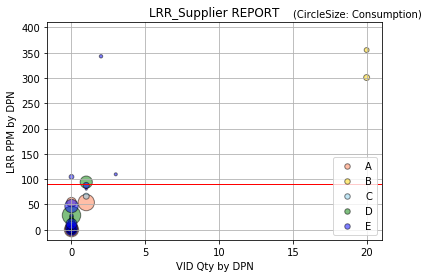

In [27]:
######### Bubble Chart by SUPPLIER
name=data['SUPPLIER'].unique()
num=len(name)
list=[]
c=['coral','gold','skyblue','green','blue']
# Seperate data by 'SUPPLIER' and write to csv
for i in range(num):
    df=data.loc[data['SUPPLIER']==name[i], ['SUPPLIER','FACTORY','DPN','LR','CONSUMPTION','VID']]
    #df.to_csv('{}.csv'.format(name[i]), index=False)   
# Read individual 'SUPPLIER' csv data    
for j in range(num):
    list.append(pd.read_csv('{}.csv'.format(name[j])))  
# use for loop itteration to plot scatter chart by 'SUPPLIER'
for k in range(num):
    color=c[k]
    df2=list[k]  # data by Supplier
    lr=df2.groupby('DPN')['LR'].sum()
    con=df2.groupby('DPN')['CONSUMPTION'].sum()
    vid=df2.groupby('DPN')['VID'].sum()
    lrr=lr/con*1000000
    sup=df2.groupby('DPN')['SUPPLIER'].unique()
    sup=sup.apply(lambda x: x.sum())   # Solve unique() wording issue
    plt.scatter(vid,lrr,s=con/3000,c=color,alpha=0.5, marker="o", edgecolors="black", label=name[k])
plt.title("LRR_Supplier REPORT")
plt.xlabel("VID Qty by DPN")
plt.ylabel("LRR PPM by DPN")
plt.grid()
plt.ylim(-20,410)
#plt.xlim(0,45)
lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([30])
plt.text(15,420, (f'(CircleSize: Consumption)'))
plt.axhline(y=90, color='red', linestyle='-', alpha=1, linewidth=1)
plt.savefig("LRR_Supplier_BubbleChart.png")
plt.show()    

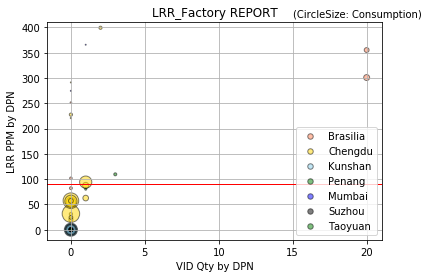

In [28]:
######### Bubble Chart by FACTORY
name=data['FACTORY'].unique()
num=len(name)
list=[]
c=['coral','gold','skyblue','green','blue','black', 'green']
# Seperate data by 'SUPPLIER' and write to csv
for i in range(num):
    df=data.loc[data['FACTORY']==name[i], ['SUPPLIER','FACTORY','DPN','LR','CONSUMPTION','VID']]
    #df.to_csv('{}.csv'.format(name[i]), index=False)
    
# Read individual 'SUPPLIER' csv data    
for j in range(num):
    list.append(pd.read_csv('{}.csv'.format(name[j])))  
# use for loop itteration to plot scatter chart by 'FACTORY'
for n in range(num):
    color=c[n]
    df2=list[n]  # data by Factory
    lr=df2.groupby('DPN')['LR'].sum()
    con=df2.groupby('DPN')['CONSUMPTION'].sum()
    vid=df2.groupby('DPN')['VID'].sum()
    lrr=lr/con*1000000
    sup=df2.groupby('DPN')['FACTORY'].unique()
    sup=sup.apply(lambda x: x.sum())   # Solve unique() wording issue
    plt.scatter(vid,lrr,s=con/3000,c=color,alpha=0.5, marker="o", edgecolors="black", label=name[n])
plt.title("LRR_Factory REPORT")
plt.xlabel("VID Qty by DPN")
plt.ylabel("LRR PPM by DPN")
plt.grid()
plt.ylim(-20,410)
#plt.xlim(0,45)
lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([30])
plt.text(15,420, (f'(CircleSize: Consumption)'))
plt.axhline(y=90, color='red', linestyle='-', alpha=1, linewidth=1)
plt.savefig("LRR_Factory_BubbleChart.png")
plt.show()    
